In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [50]:
db = pd.read_csv("C://Users//summerintern.yash//Desktop//Diabetes-EDA//diabetes.csv")
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158EE90E630>,
      dtype=object)

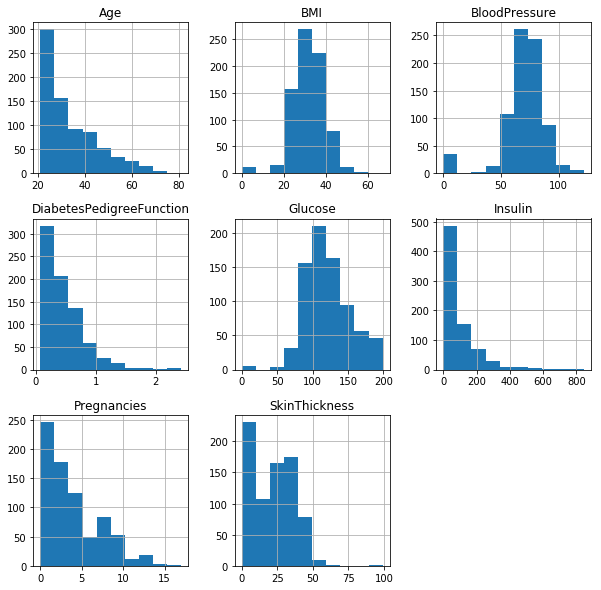

In [52]:
db[db.columns[:8]].hist(figsize=(10,10))

In [53]:
print(db.columns)
print()
print("Dimensions: {}".format(db.shape))

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Dimensions: (768, 9)


Outcome
0    500
1    268
dtype: int64


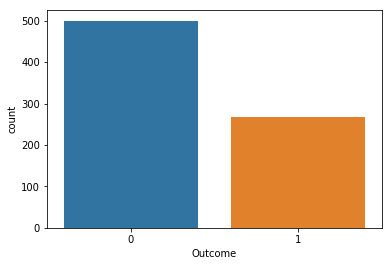

In [54]:
print(db.groupby('Outcome').size())
sns.countplot(db['Outcome'], label = 'count')
plt.show()

In [55]:
x_train, x_test, y_train, y_test = train_test_split(db.loc[:,db.columns != 'Outcome'], db['Outcome'],
                                                   stratify = db['Outcome'], random_state=66)

sv = SVC()
sv.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(sv.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(sv.score(x_test, y_test)))
#Here the SVM model overfits
#This happens as all the features are not scaled
#To overcome this, the data should be rescaled so that all the features are on the same scale

Accuracy on training set: 1.000
Accuracy on test set: 0.651


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [56]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

svs = SVC(C=1000)
svs.fit(x_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svs.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svs.score(x_test_scaled, y_test)))

Accuracy on training set: 0.790
Accuracy on test set: 0.797


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
